## Laboratory 4
### Regularization
Regularization Lasso and Ridge for Linear regresion



Import Libraries and data


In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
 
X = data
y = target


In [230]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [231]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [232]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [233]:
X_train , X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=15)


In [234]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [235]:
reg = LinearRegression().fit(X_train,y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)


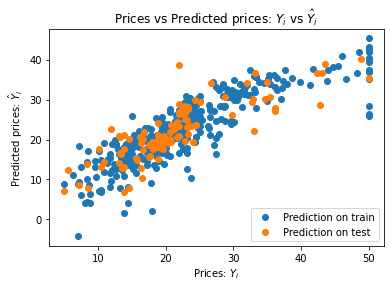

In [236]:
plt.scatter(y_train, y_train_pred,label='Prediction on train')
plt.scatter(y_test, y_pred,label='Prediction on test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

In [237]:
residual = y_pred - y_test
MSE = np.square(residual).mean()
print("MSE on test: {:.2f}".format(MSE))

MSE on test: 23.81


In [238]:
residual = y_train_pred - y_train
MSE = np.square(residual).mean()
print("MSE on train: {:.2f}".format(MSE))

MSE on train: 21.87


In [239]:
score = reg.score(X_train,y_train)
print("Score value on train: {:.2f}".format(score))

Score value on train: 0.75


In [240]:
score = reg.score(X_test,y_test)
print("Score value on test: {:.2f}".format(score))

Score value on test: 0.69


Polymonial features

In [241]:
polynomial_features = PolynomialFeatures(degree=2)



In [242]:
X_poly = polynomial_features.fit_transform(X_norm)


In [243]:
X_train , X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=9)
reg = LinearRegression().fit(X_train,y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

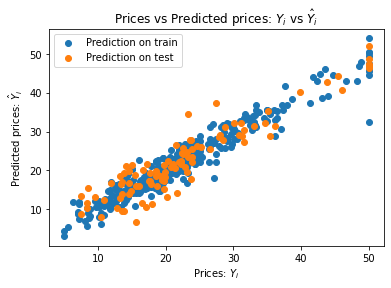

In [244]:
plt.scatter(y_train, y_train_pred,label='Prediction on train')
plt.scatter(y_test, y_pred,label='Prediction on test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

In [245]:
residual = y_pred - y_test
MSE = np.square(residual).mean()
print("MSE on test: {:.2f}".format(MSE))

MSE on test: 13.05


In [246]:
residual = y_train_pred - y_train
MSE = np.square(residual).mean()
print("MSE on train: {:.2f}".format(MSE))

MSE on train: 5.68


In [247]:
score = reg.score(X_test,y_test)
print("Score value on test: {:.2f}".format(score))

Score value on test: 0.87


In [248]:
score = reg.score(X_train,y_train)
print("Score value on train: {:.2f}".format(score))

Score value on train: 0.93


Regularization

Lasso

In [249]:
X_train , X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=9)
lasso = Lasso(alpha=0.001,max_iter=10000).fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

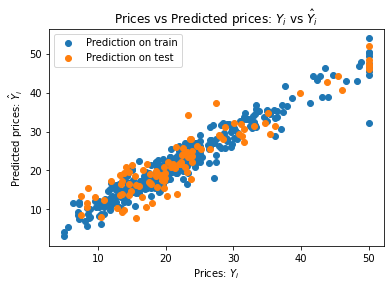

In [250]:
plt.scatter(y_train, y_train_pred,label='Prediction on train')
plt.scatter(y_test, y_pred,label='Prediction on test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

In [251]:
alpha_array = np.linspace(0.001,2,100)
MSE_list_test = []
MSE_list_train = []
score_list_test = []
score_list_train = []
for a in alpha_array:
    lasso = Lasso(alpha=a,max_iter=1000).fit(X_train,y_train)
    y_train_pred = lasso.predict(X_train)
    y_pred = lasso.predict(X_test)
    residual = y_pred - y_test
    residual1 = y_train_pred - y_train
    MSE_list_test.append(np.square(residual).mean())
    MSE_list_train.append(np.square(residual1).mean())
    score_list_test.append(lasso.score(X_train,y_train)*100)
    score_list_train.append(lasso.score(X_test,y_test)*100)
    

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+03, tolerance: 3.239e+00
  model = cd_fast.enet_coordinate_descent(


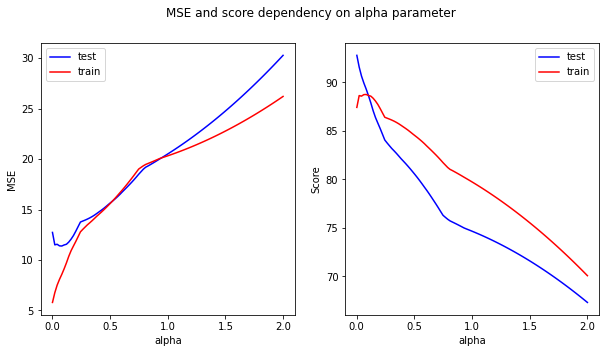

In [252]:
figure, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(alpha_array,MSE_list_test,color='b',label='test')
ax[0].plot(alpha_array,MSE_list_train,color='r',label='train')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MSE')
ax[0].legend()
ax[1].plot(alpha_array,score_list_test,color='b',label='test')
ax[1].plot(alpha_array,score_list_train,color='r',label='train')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('Score')
ax[1].legend()
figure.suptitle("MSE and score dependency on alpha parameter")
plt.show()

Ridge

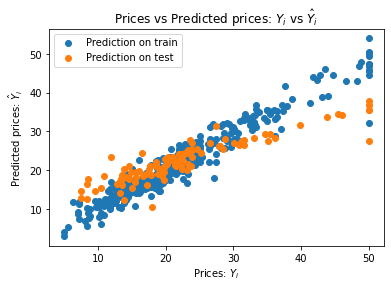

In [253]:

ridge = Ridge(alpha=0.001).fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_pred = lasso.predict(X_test)
plt.scatter(y_train, y_train_pred,label='Prediction on train')
plt.scatter(y_test, y_pred,label='Prediction on test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

In [254]:
alpha_array = np.linspace(1,30,100)
MSE_list_test = []
MSE_list_train = []
score_list_test = []
score_list_train = []
for a in alpha_array:
    ridge = Ridge(alpha=a,max_iter=100).fit(X_train,y_train)
    y_train_pred = ridge.predict(X_train)
    y_pred = ridge.predict(X_test)
    residual = y_pred - y_test
    residual1 = y_train_pred - y_train
    MSE_list_test.append(np.square(residual).mean())
    MSE_list_train.append(np.square(residual1).mean())
    score_list_test.append(ridge.score(X_train,y_train)*100)
    score_list_train.append(ridge.score(X_test,y_test)*100)

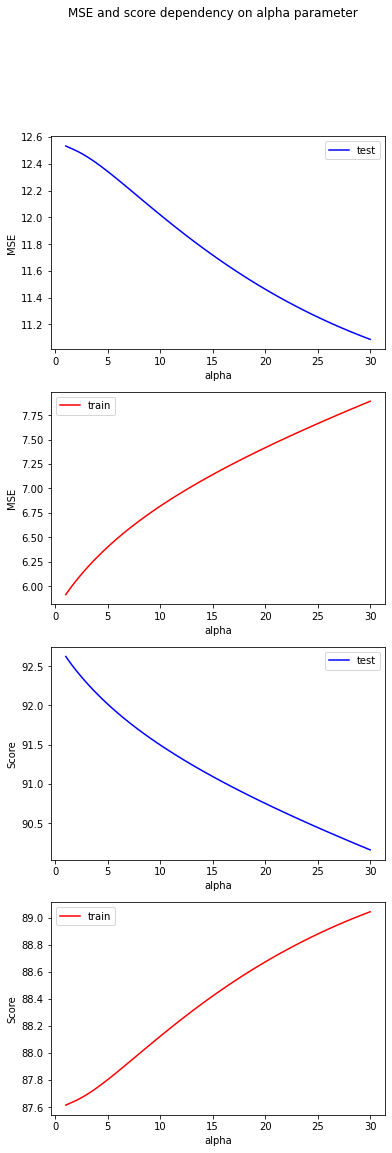

In [255]:
figure, ax = plt.subplots(4,1,figsize=(6,18))
ax[0].plot(alpha_array,MSE_list_test,color='b',label='test')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('MSE')
ax[0].legend()
ax[1].plot(alpha_array,MSE_list_train,color='r',label='train')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('MSE')
ax[1].legend()
ax[2].plot(alpha_array,score_list_test,color='b',label='test')
ax[2].set_xlabel('alpha')
ax[2].set_ylabel('Score')
ax[2].legend()
ax[3].plot(alpha_array,score_list_train,color='r',label='train')
ax[3].set_xlabel('alpha')
ax[3].set_ylabel('Score')
ax[3].legend()
figure.suptitle("MSE and score dependency on alpha parameter")
plt.show()

## Regularization for logistic regression

In [256]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

In [257]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_train , X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2)


For alpha = 0.0001 accuracy score is: 0.93
For alpha = 0.11120000000000001 accuracy score is: 0.99
For alpha = 0.2223 accuracy score is: 0.99
For alpha = 0.33340000000000003 accuracy score is: 0.99
For alpha = 0.4445 accuracy score is: 0.99
For alpha = 0.5556 accuracy score is: 0.99
For alpha = 0.6667000000000001 accuracy score is: 0.99
For alpha = 0.7778 accuracy score is: 0.99
For alpha = 0.8889 accuracy score is: 0.99
For alpha = 1.0 accuracy score is: 0.99


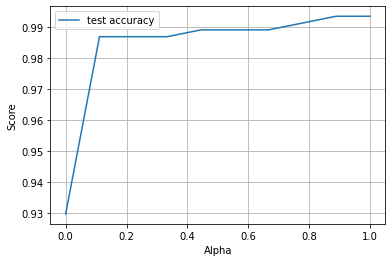

In [258]:
alpha_list = np.linspace(0.0001, 1, 10)
score_list_test = []
for i in range(len(alpha_list)):
    log_reg = LogisticRegression(penalty='l2',max_iter=1000,solver='liblinear',C=alpha_list[i]).fit(X_train,y_train)
    score_list_test.append(log_reg.score(X_train,y_train))
    print("For alpha = {} accuracy score is: {:.2f}".format(alpha_list[i],score_list_test[i]))
plt.plot(alpha_list,score_list_test,label='test accuracy')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()
    